In [3]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import re

In [4]:
ebay_tracker = pd.read_csv('C:\\Users\\kenne\\Desktop\\eBay Tracker.csv', encoding='utf-8')

ebay_tracker.set_index('Item Number', inplace=True, drop=True)

# print(ebay_tracker.head())

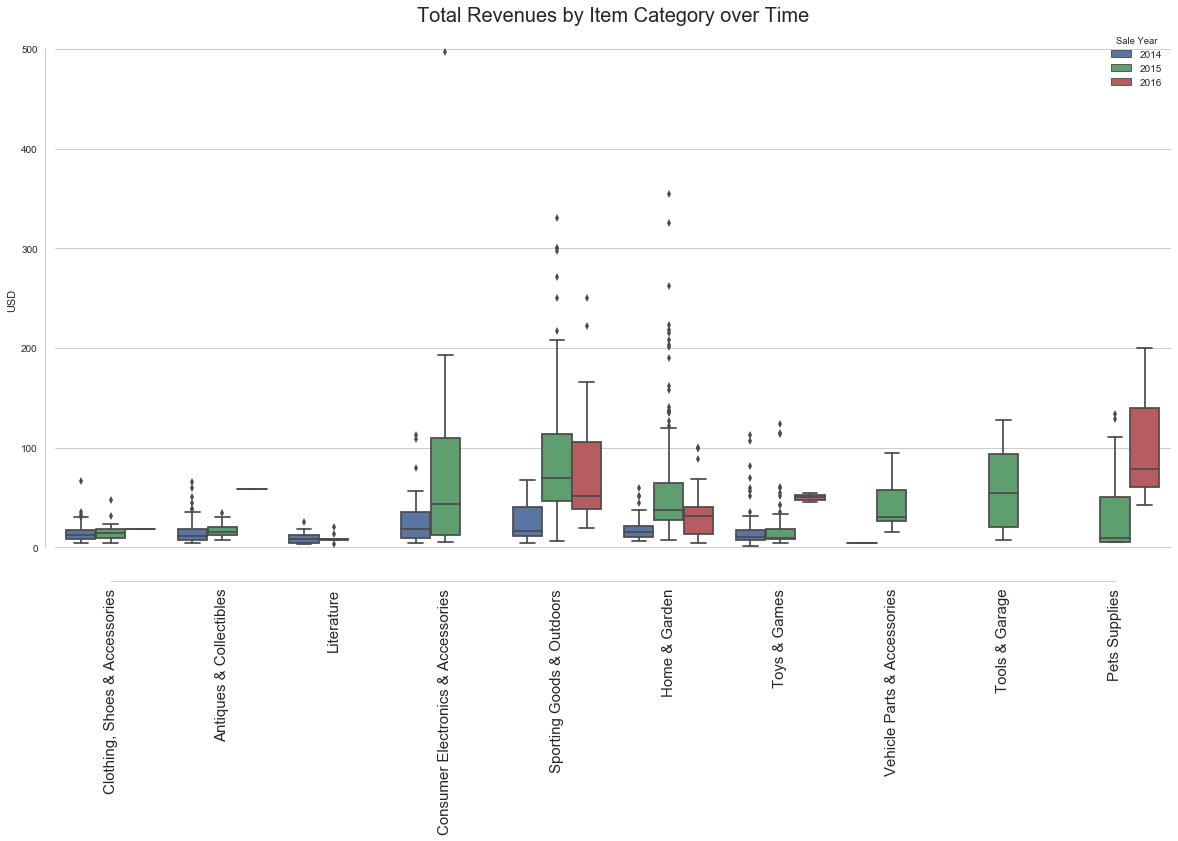

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

ax = sns.boxplot(x='Item Category', y='Total Revenue', hue='Sale Year', data=ebay_tracker)

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='USD')
plt.title('Total Revenues by Item Category over Time', size=20)
plt.xticks(rotation=90, size=15)

plt.show()

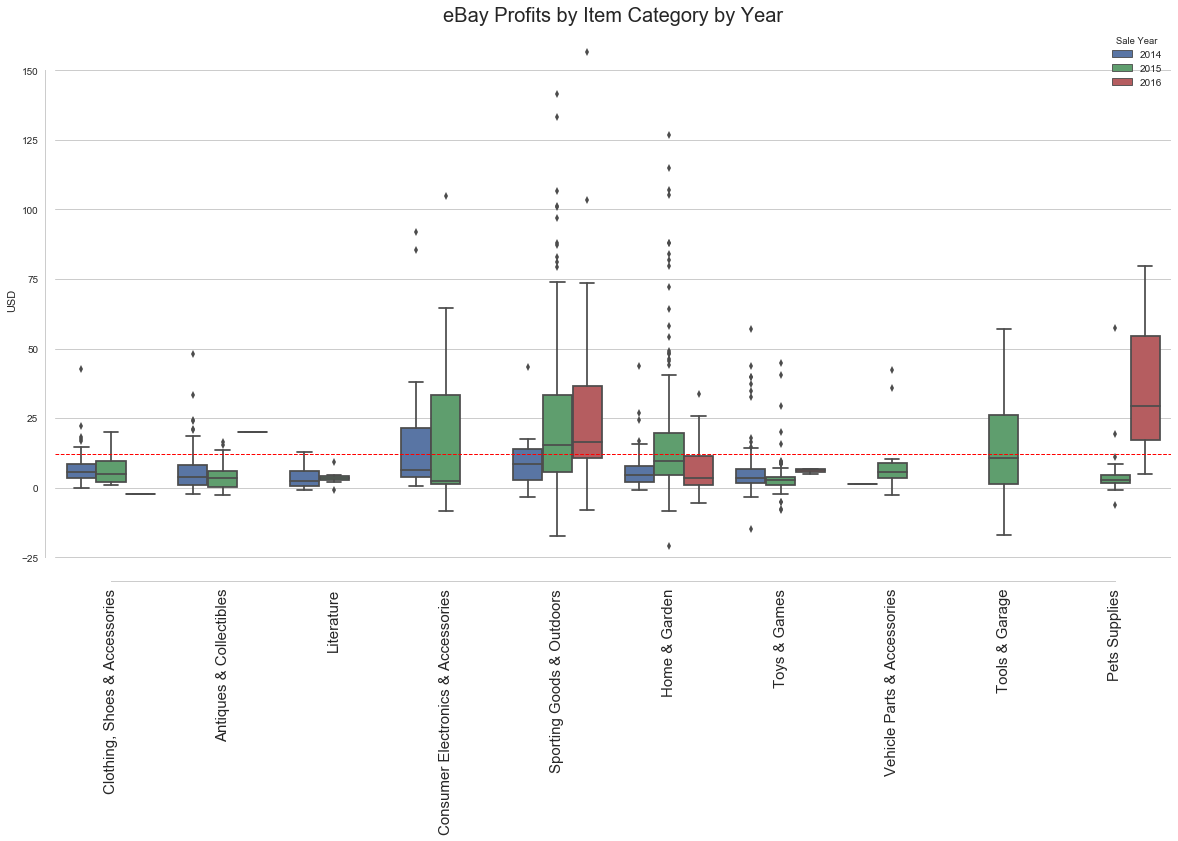

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

ax = sns.boxplot(x='Item Category', y='Net Profit/(Loss)', hue='Sale Year', data=ebay_tracker)

sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='USD')
plt.title('eBay Profits by Item Category by Year', size=20)
plt.xticks(rotation=90, size=15)
plt.axhline(ebay_tracker['Net Profit/(Loss)'].mean(), color='red', linestyle='dashed', linewidth=1)

plt.show()

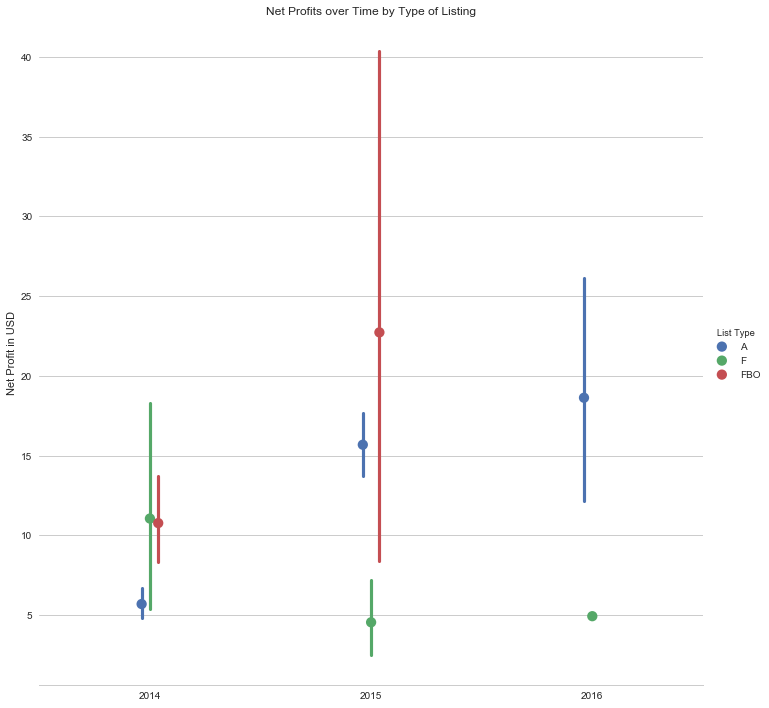

In [57]:
sns.set(style="whitegrid")

g = sns.factorplot(x='Sale Year', y='Net Profit/(Loss)', hue='List Type', data=ebay_tracker, size=10, kind='point', dodge=True, join=False)
g.despine(left=True)
g.set_ylabels("Net Profit in USD")
g.set_xlabels('')
plt.title('Net Profits over Time by Type of Listing')

plt.show()

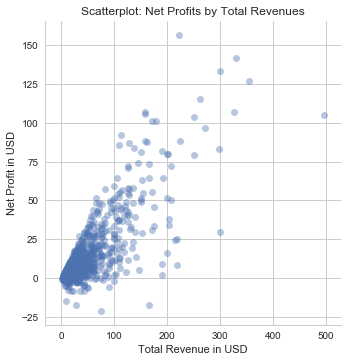

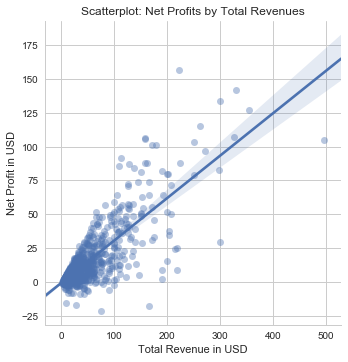

In [66]:
g = sns.lmplot(y='Net Profit/(Loss)', x='Total Revenue', data=ebay_tracker, fit_reg=False, scatter_kws={'alpha':0.4})
g.set_ylabels("Net Profit in USD")
g.set_xlabels("Total Revenue in USD")
plt.title('Scatterplot: Net Profits by Total Revenues')

plt.show()

g = sns.lmplot(y='Net Profit/(Loss)', x='Total Revenue', data=ebay_tracker, fit_reg=True, scatter_kws={'alpha':0.4})
g.set_ylabels("Net Profit in USD")
g.set_xlabels("Total Revenue in USD")
plt.title('Scatterplot: Net Profits by Total Revenues')

plt.show()

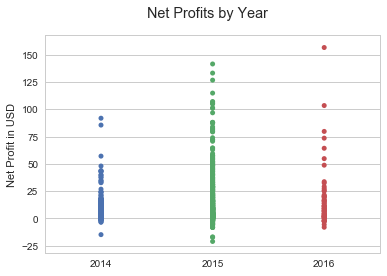

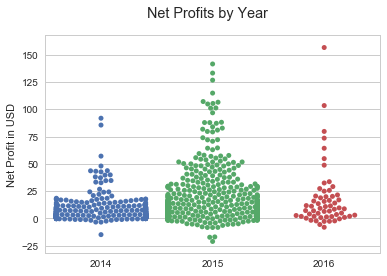

In [7]:
sns.stripplot(x='Sale Year', y='Net Profit/(Loss)', data=ebay_tracker)
plt.suptitle('Net Profits by Year')
plt.xlabel('')
plt.ylabel('Net Profit in USD')

plt.show()


sns.swarmplot(x='Sale Year', y='Net Profit/(Loss)', data=ebay_tracker)
plt.suptitle('Net Profits by Year')
plt.xlabel('')
plt.ylabel('Net Profit in USD')

plt.show()

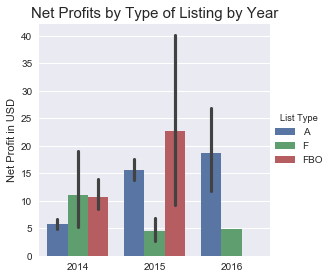

In [92]:
sns.factorplot(x='Sale Year', y='Net Profit/(Loss)', hue='List Type', data=ebay_tracker, kind='bar')

plt.title('Net Profits by Type of Listing by Year', size=15)
plt.xlabel('')
plt.ylabel('Net Profit in USD')

plt.show()

In [40]:
ebay_tracker.groupby('Item Category').aggregate({
    'Total Revenue': 'mean',
    'Total Expense': 'mean',
    'Net Profit/(Loss)': 'mean'})

,Total Revenue,Total Expense,Net Profit/(Loss)
Item Category,,,
Antiques & Collectibles,15.668134,9.883209,5.784925
"Clothing, Shoes & Accessories",14.863011,8.128495,6.734624
Consumer Electronics & Accessories,57.904242,38.257879,19.646364
Home & Garden,47.447606,33.659366,13.788239
Literature,9.004500,5.588500,3.416250
Pets Supplies,39.915714,30.619286,9.296786
Sporting Goods & Outdoors,81.096667,56.949000,24.147667
Tools & Garage,57.749200,43.404400,14.344800
Toys & Games,16.776101,11.405275,5.370826


In [101]:
ebay_tracker.groupby('Sale Year').aggregate({
    'Total Revenue': 'sum',
    'Net Profit/(Loss)': 'sum'
})

,Total Revenue,Net Profit/(Loss)
Sale Year,,
2014,6802.83,2879.96
2015,32648.17,9140.61
2016,3535.73,1066.89


In [102]:
ebay_tracker.groupby('List Type').aggregate({
    'Total Revenue': 'sum',
    'Net Profit/(Loss)': 'sum'
})

,Total Revenue,Net Profit/(Loss)
List Type,,
A,39628.71,11734.23
F,665.20,226.87
FBO,2692.82,1126.36


In [108]:
a_profit_perc = ebay_tracker.loc[lambda df: ebay_tracker['List Type'] == 'A', 'Net Profit/(Loss)'].mean()
print(a_profit_perc)

12.287151832460733


In [105]:
f_profit_perc = ebay_tracker.loc[lambda df: ebay_tracker['List Type'] == 'F', 'Net Profit/(Loss)'].mean()
print(f_profit_perc)

6.67264705882353


In [106]:
fbo_profit_perc = ebay_tracker.loc[lambda df: ebay_tracker['List Type'] == 'FBO', 'Net Profit/(Loss)'].mean()
print(fbo_profit_perc)

12.655730337078653


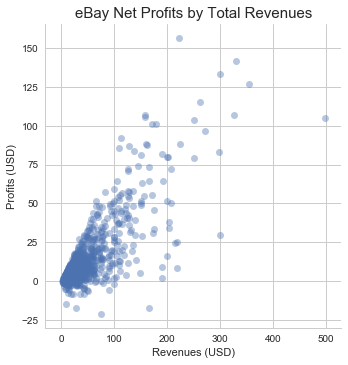

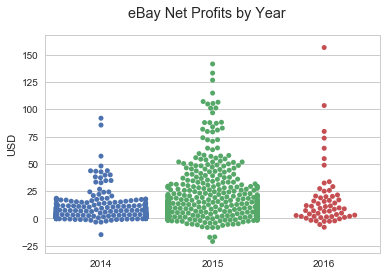

In [34]:
g = sns.lmplot(y='Net Profit/(Loss)', x='Total Revenue', data=ebay_tracker, fit_reg=False, scatter_kws={'alpha':0.4})
g.set_ylabels("Profits (USD)")
g.set_xlabels("Revenues (USD)")
plt.title('eBay Net Profits by Total Revenues', size=15)
plt.show()

sns.swarmplot(x='Sale Year', y='Net Profit/(Loss)', data=ebay_tracker)
plt.suptitle('eBay Net Profits by Year')
plt.xlabel('')
plt.ylabel('USD')
plt.show()